In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
data = pd.read_csv('vehicle_csv.csv')
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [23]:
df = data.copy(deep = True)

In [24]:
rows, column = df.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 846 rows and 19 columns.


In [25]:
print('The data type of each attribute: \n')
df.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846

In [26]:
print('Duplicated rows: ', df[df.duplicated()].shape[0]) #no duplicate rows

Duplicated rows:  0


In [27]:
print('Null values:\n', df.isnull().sum())

Null values:
 COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64


In [28]:
for cols in df.columns:
    if cols != 'class' and df[cols].dtype in (int, float):
        df[cols] = df[cols].fillna(df[cols].median())


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COMPACTNESS,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
CIRCULARITY,846.0,44.861702,6.169866,33.0,40.00,44.0,49.0,59.0
DISTANCE_CIRCULARITY,846.0,82.088652,15.771533,40.0,70.00,80.0,98.0,112.0
RADIUS_RATIO,846.0,168.940898,33.472183,104.0,141.00,167.0,195.0,333.0
PR.AXIS_ASPECT_RATIO,846.0,61.693853,7.888251,47.0,57.00,61.0,65.0,138.0
MAX.LENGTH_ASPECT_RATIO,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
SCATTER_RATIO,846.0,168.839243,33.244978,112.0,146.25,157.0,198.0,265.0
ELONGATEDNESS,846.0,40.933806,7.811560,26.0,33.00,43.0,46.0,61.0
PR.AXIS_RECTANGULARITY,846.0,20.582742,2.592138,17.0,19.00,20.0,23.0,29.0
MAX.LENGTH_RECTANGULARITY,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


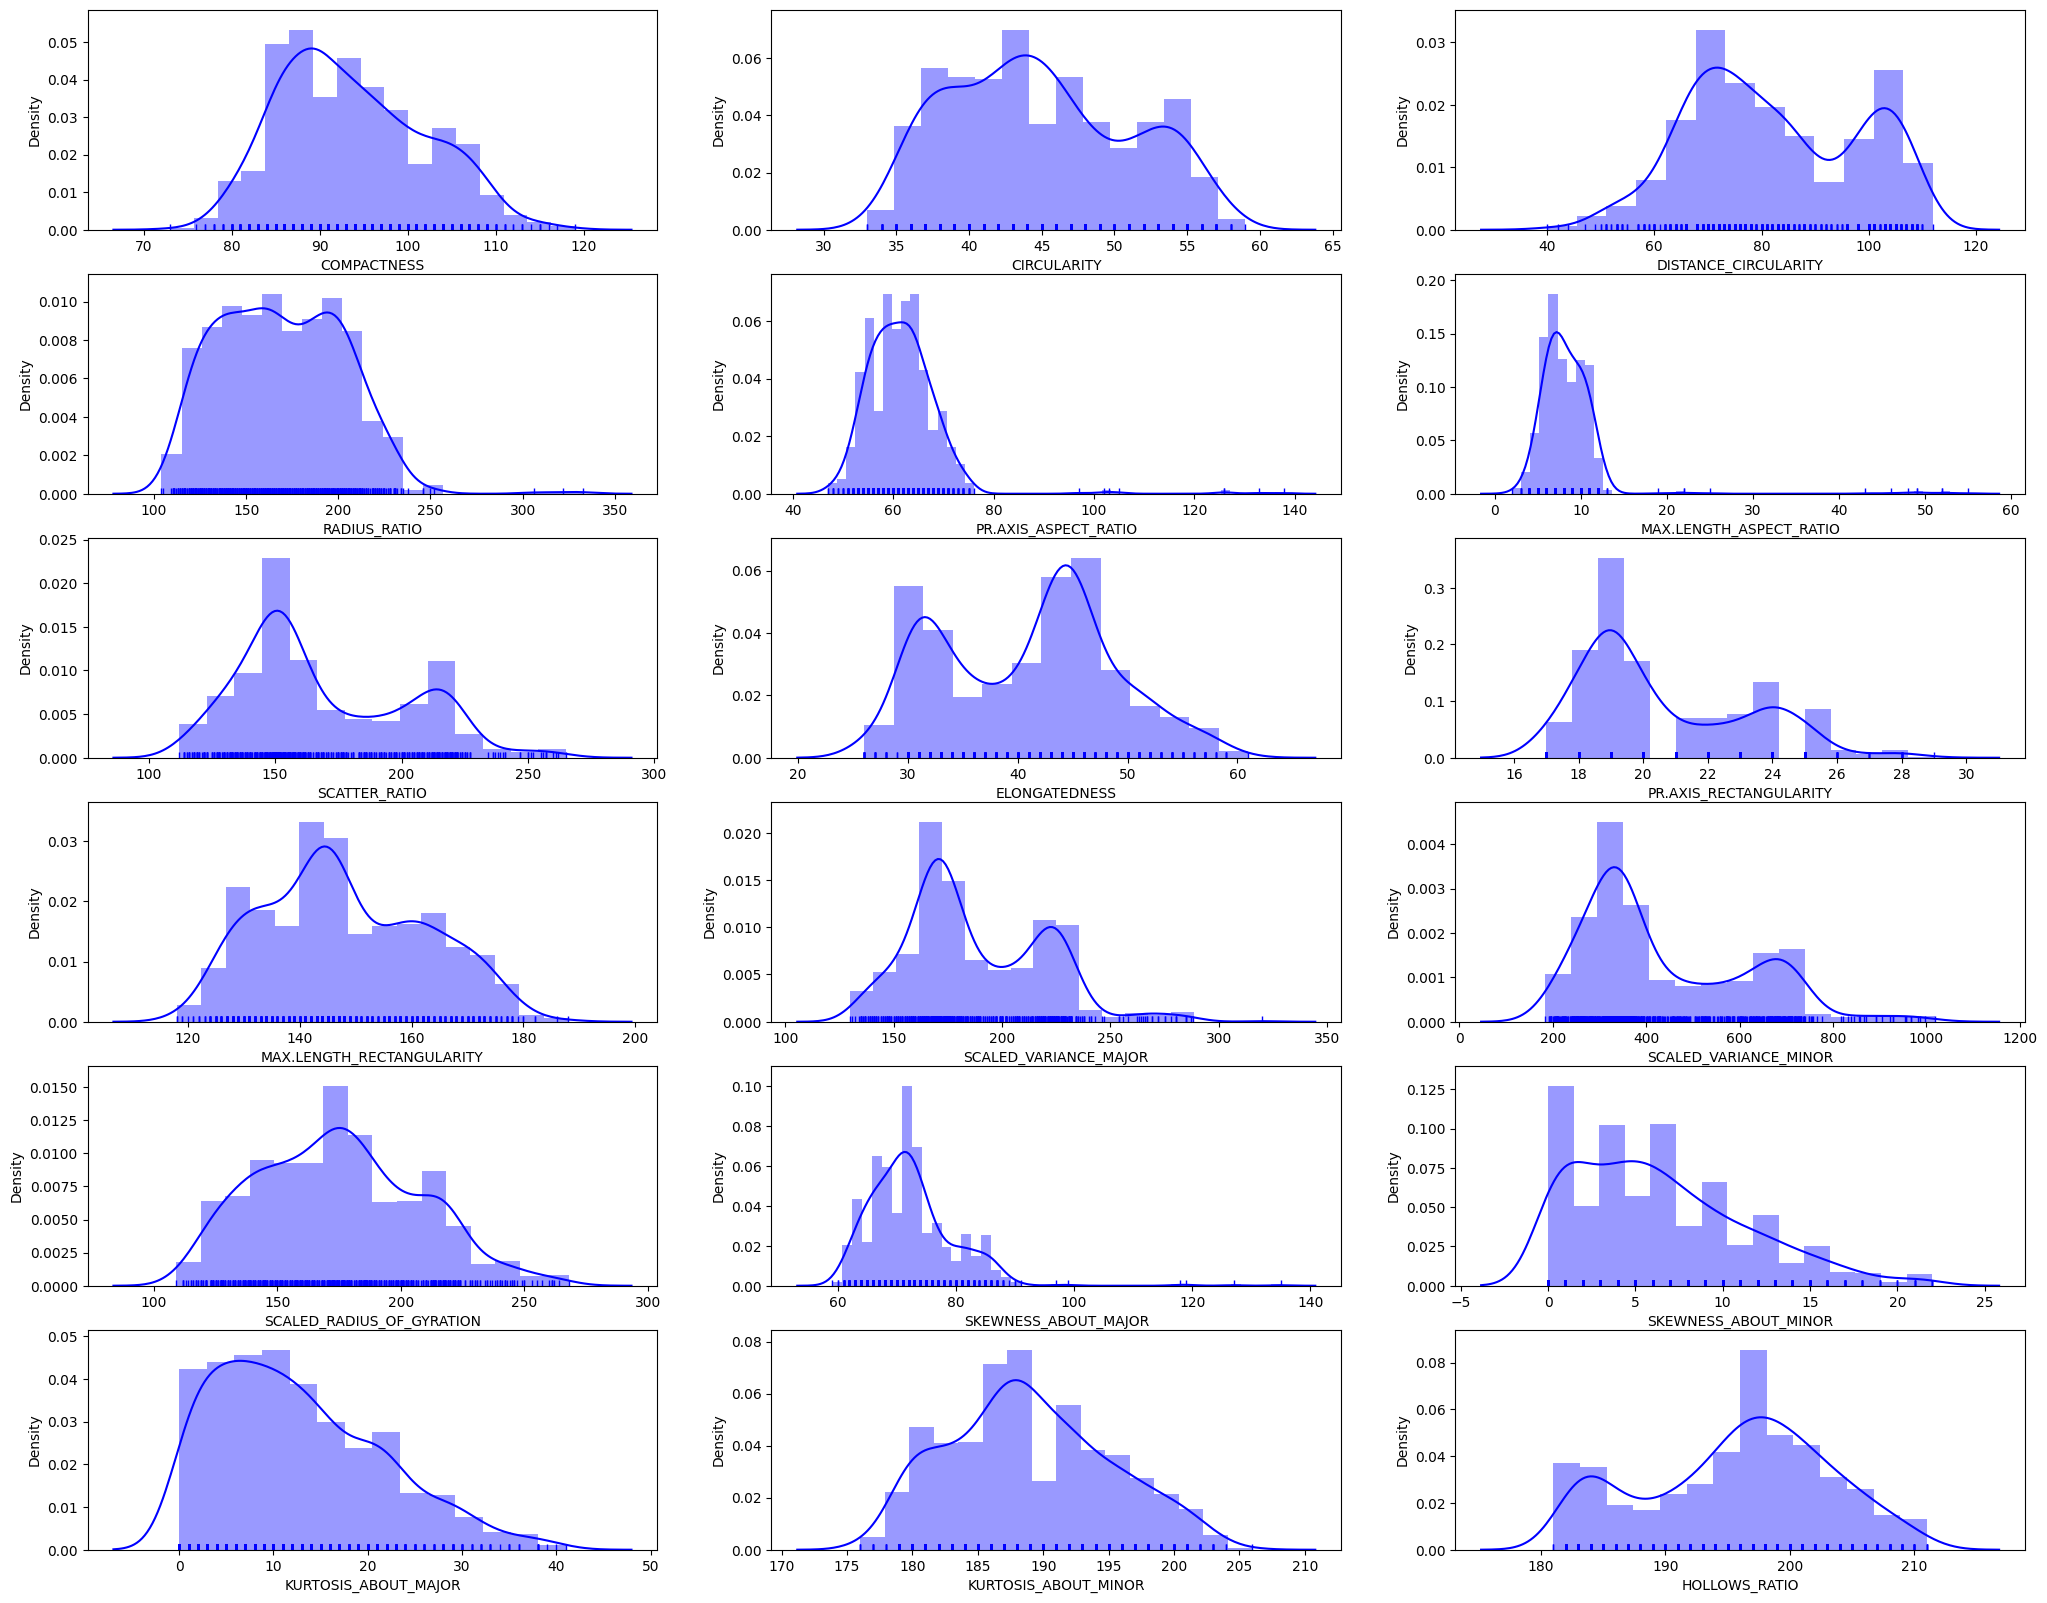

In [30]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'Class').columns:
    plt.subplot(6, 3, col)
    sns.distplot(df[i], color = 'b', rug = True)
    col += 1 

Class
bus     218
saab    217
opel    212
van     199
Name: count, dtype: int64


<Axes: title={'center': 'Count of Vehicle Class column'}, xlabel='Class', ylabel='count'>

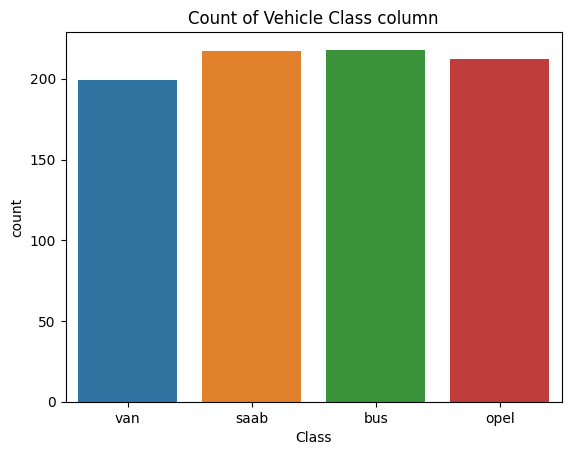

In [31]:
print(df['Class'].value_counts())
plt.title('Count of Vehicle Class column')
sns.countplot(x = 'Class', data = df)


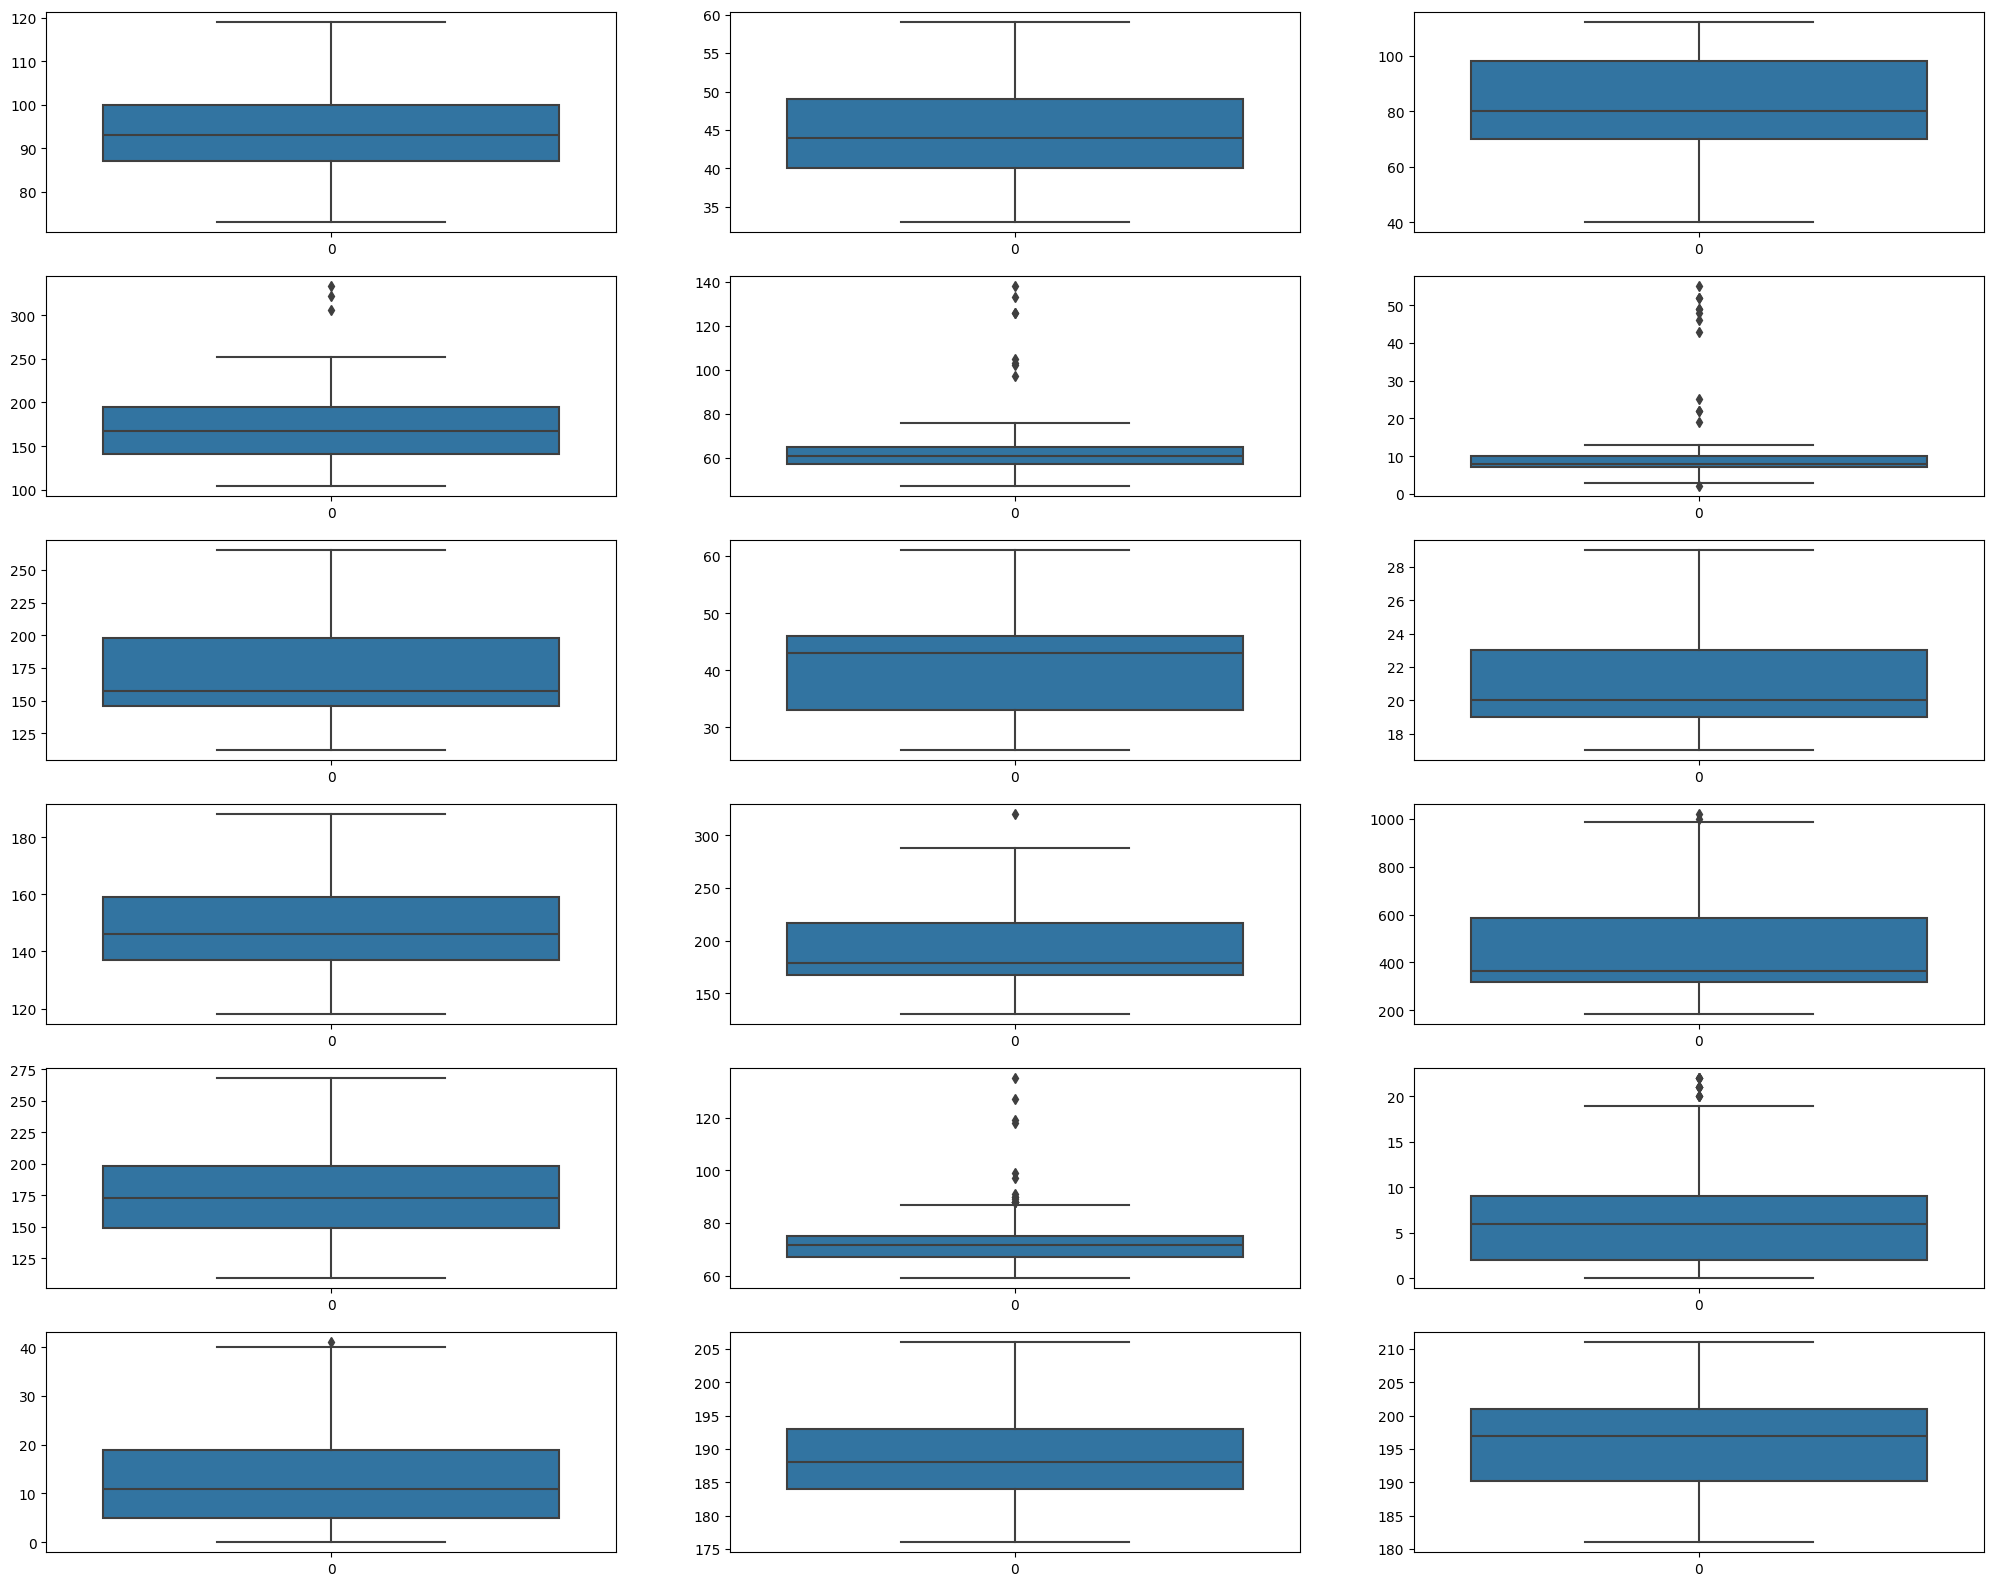

In [32]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'Class').columns:
    plt.subplot(6, 3, col)
    sns.boxplot(df[i])
    col += 1 

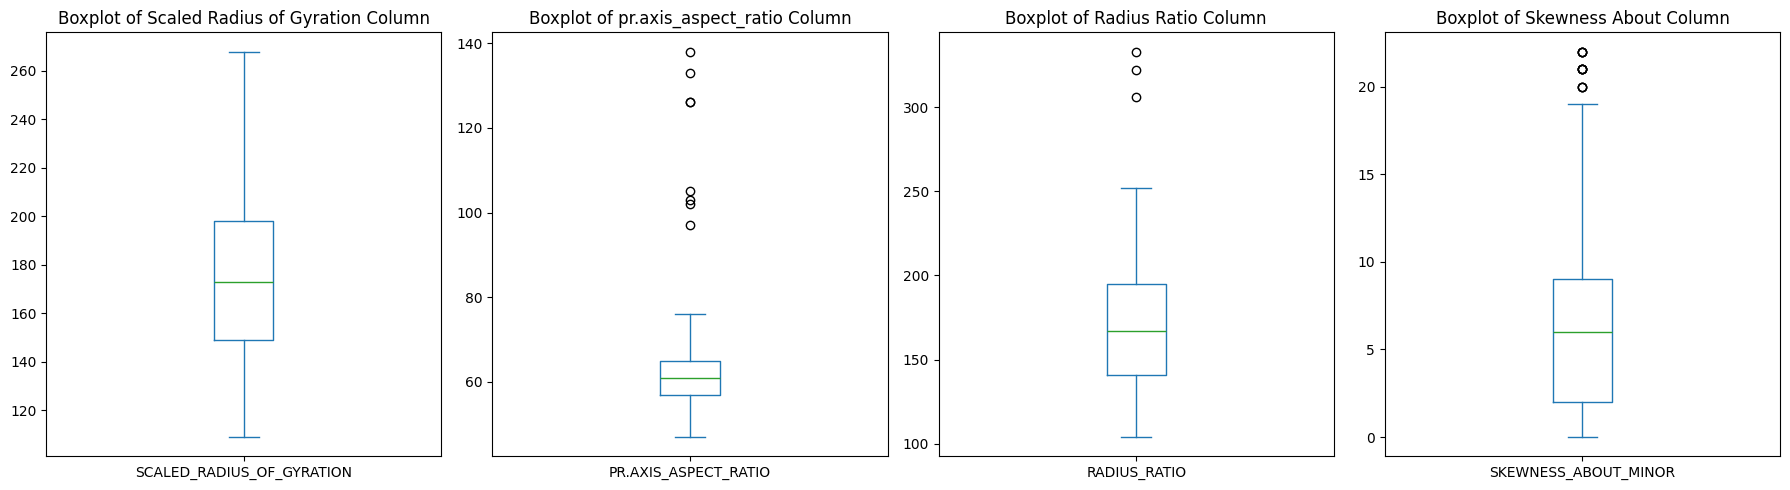

In [33]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
df['SCALED_RADIUS_OF_GYRATION'].plot(kind='box')
plt.title('Boxplot of Scaled Radius of Gyration Column')

plt.subplot(1, 4, 2)
df['PR.AXIS_ASPECT_RATIO'].plot(kind='box')
plt.title('Boxplot of pr.axis_aspect_ratio Column')

plt.subplot(1, 4, 3)
df['RADIUS_RATIO'].plot(kind='box')
plt.title('Boxplot of Radius Ratio Column')

plt.subplot(1, 4, 4)
df['SKEWNESS_ABOUT_MINOR'].plot(kind='box')
plt.title('Boxplot of Skewness About Column')

plt.tight_layout()
plt.show()


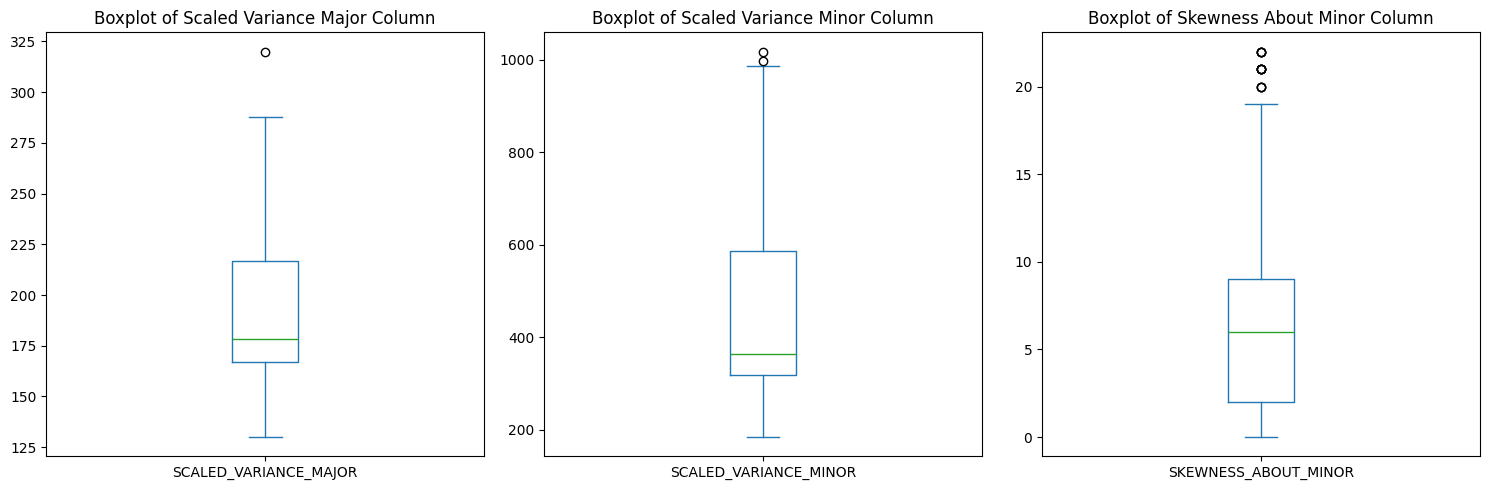

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['SCALED_VARIANCE_MAJOR'].plot(kind='box')
plt.title('Boxplot of Scaled Variance Major Column')

plt.subplot(1, 3, 2)
df['SCALED_VARIANCE_MINOR'].plot(kind='box')
plt.title('Boxplot of Scaled Variance Minor Column')

plt.subplot(1, 3, 3)
df['SKEWNESS_ABOUT_MINOR'].plot(kind='box')
plt.title('Boxplot of Skewness About Minor Column')

plt.tight_layout()
plt.show()


In [35]:
#find the outliers and replace them by median
for col_name in df.drop(columns = 'Class').columns:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

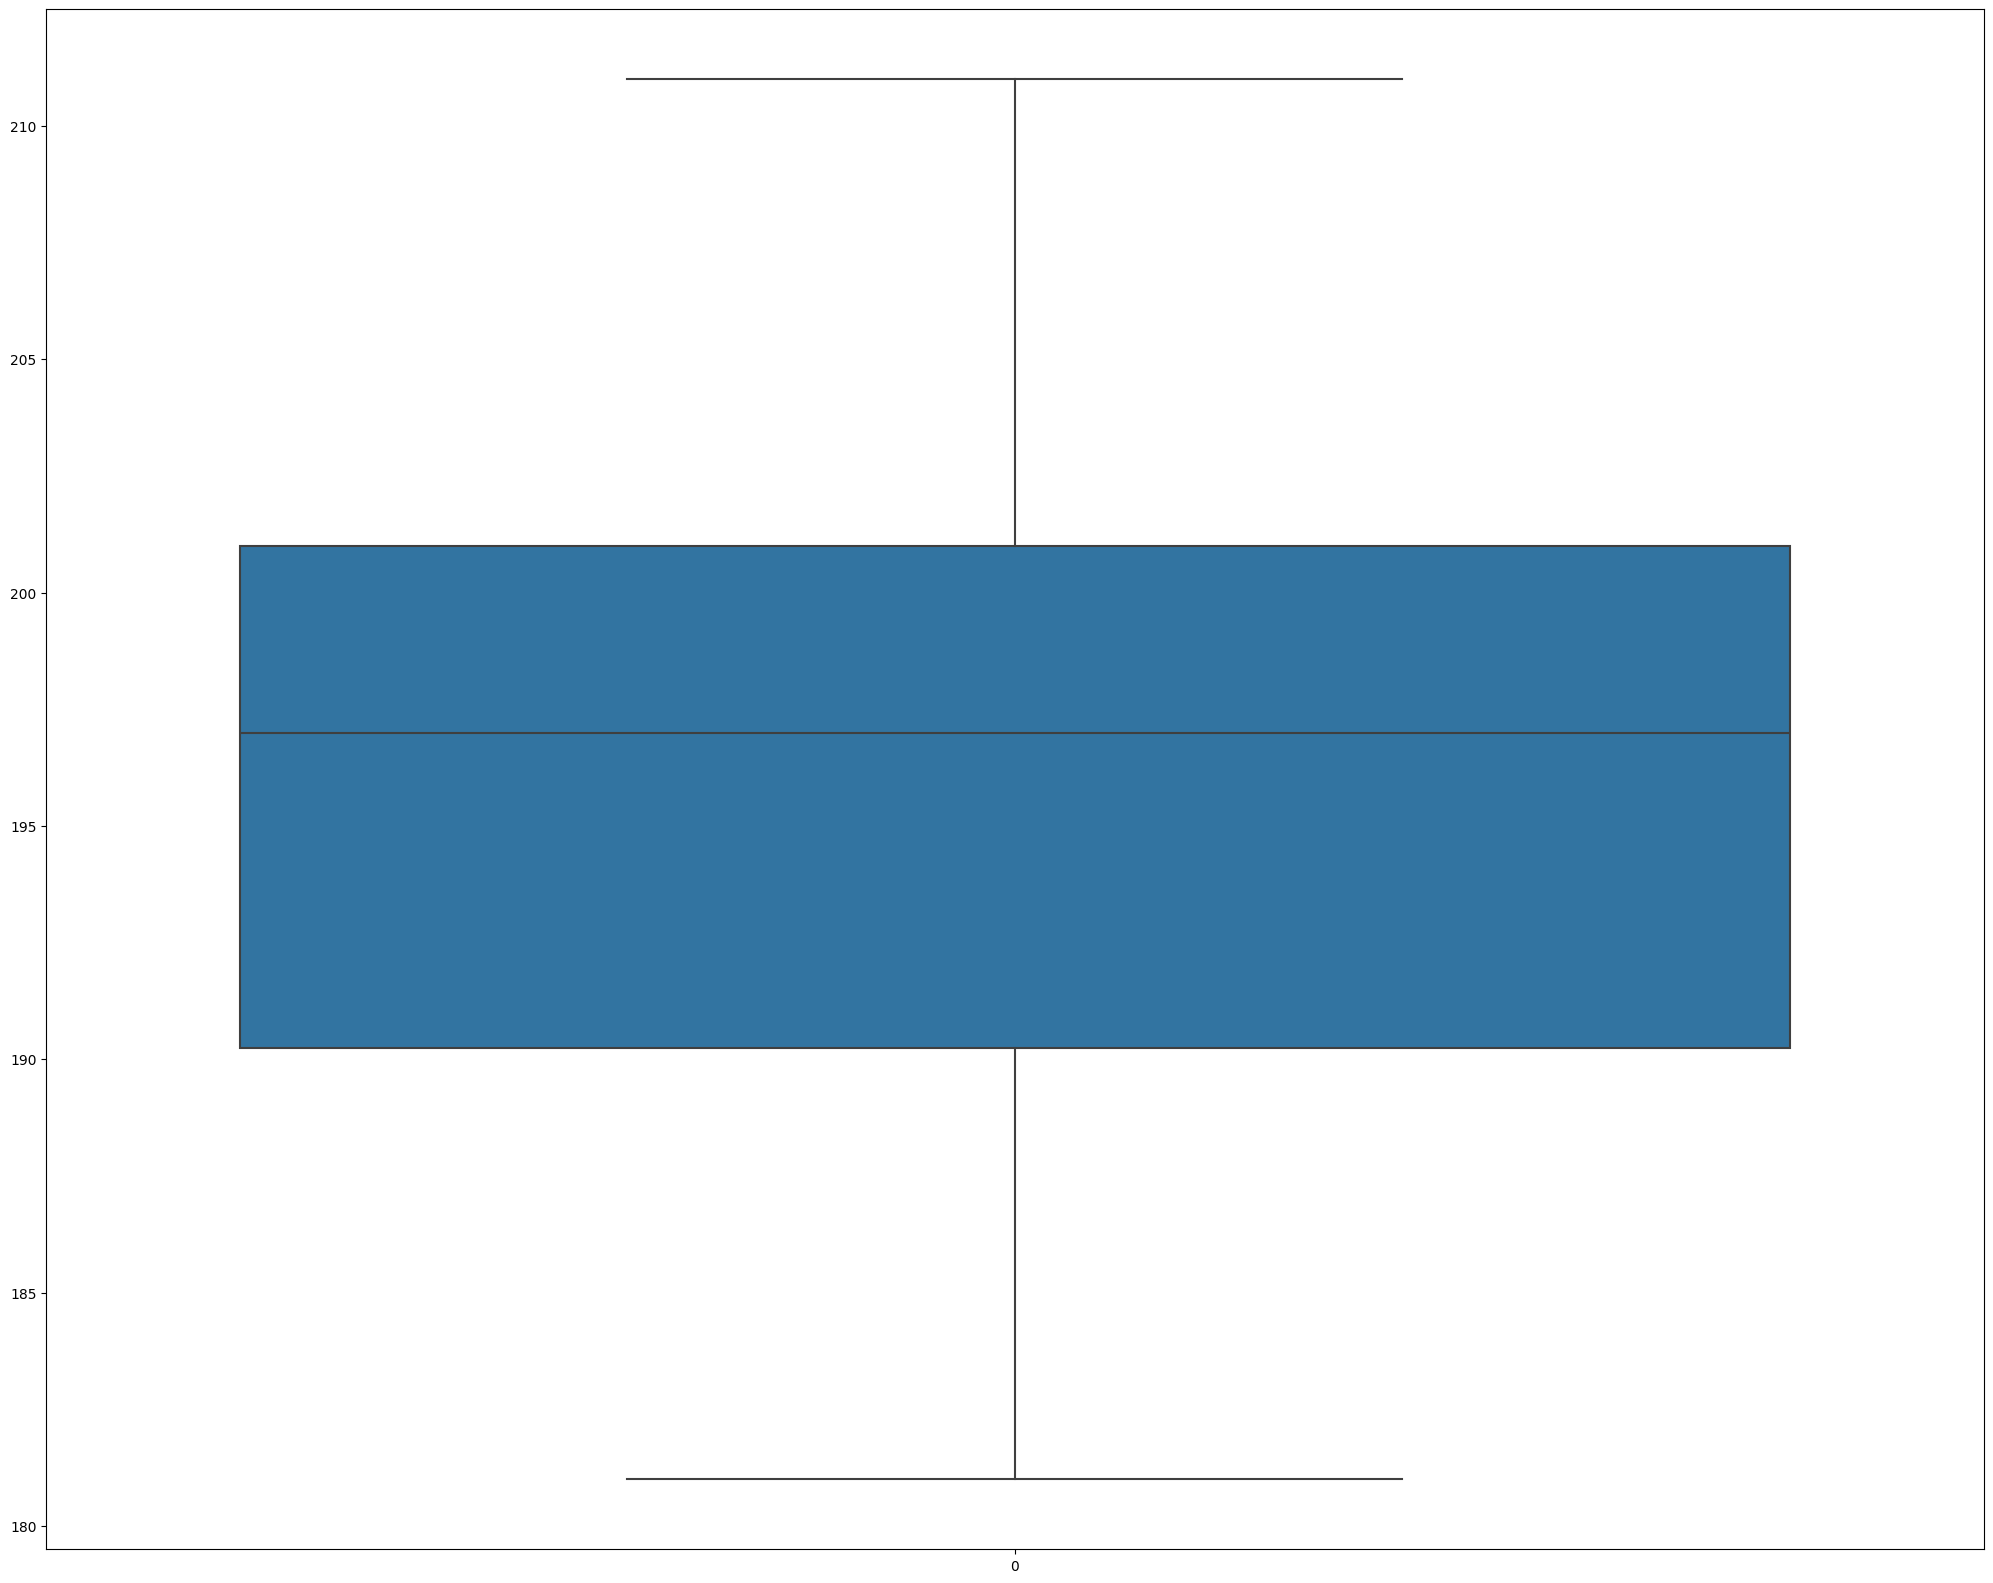

In [36]:
plt.figure(figsize=(25, 20))
col = 1
sns.boxplot(df[i])
col += 1 

In [37]:
# Select only numeric columns for correlation computation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation = numeric_columns.corr()


<Axes: title={'center': 'Correlation HeatMap'}>

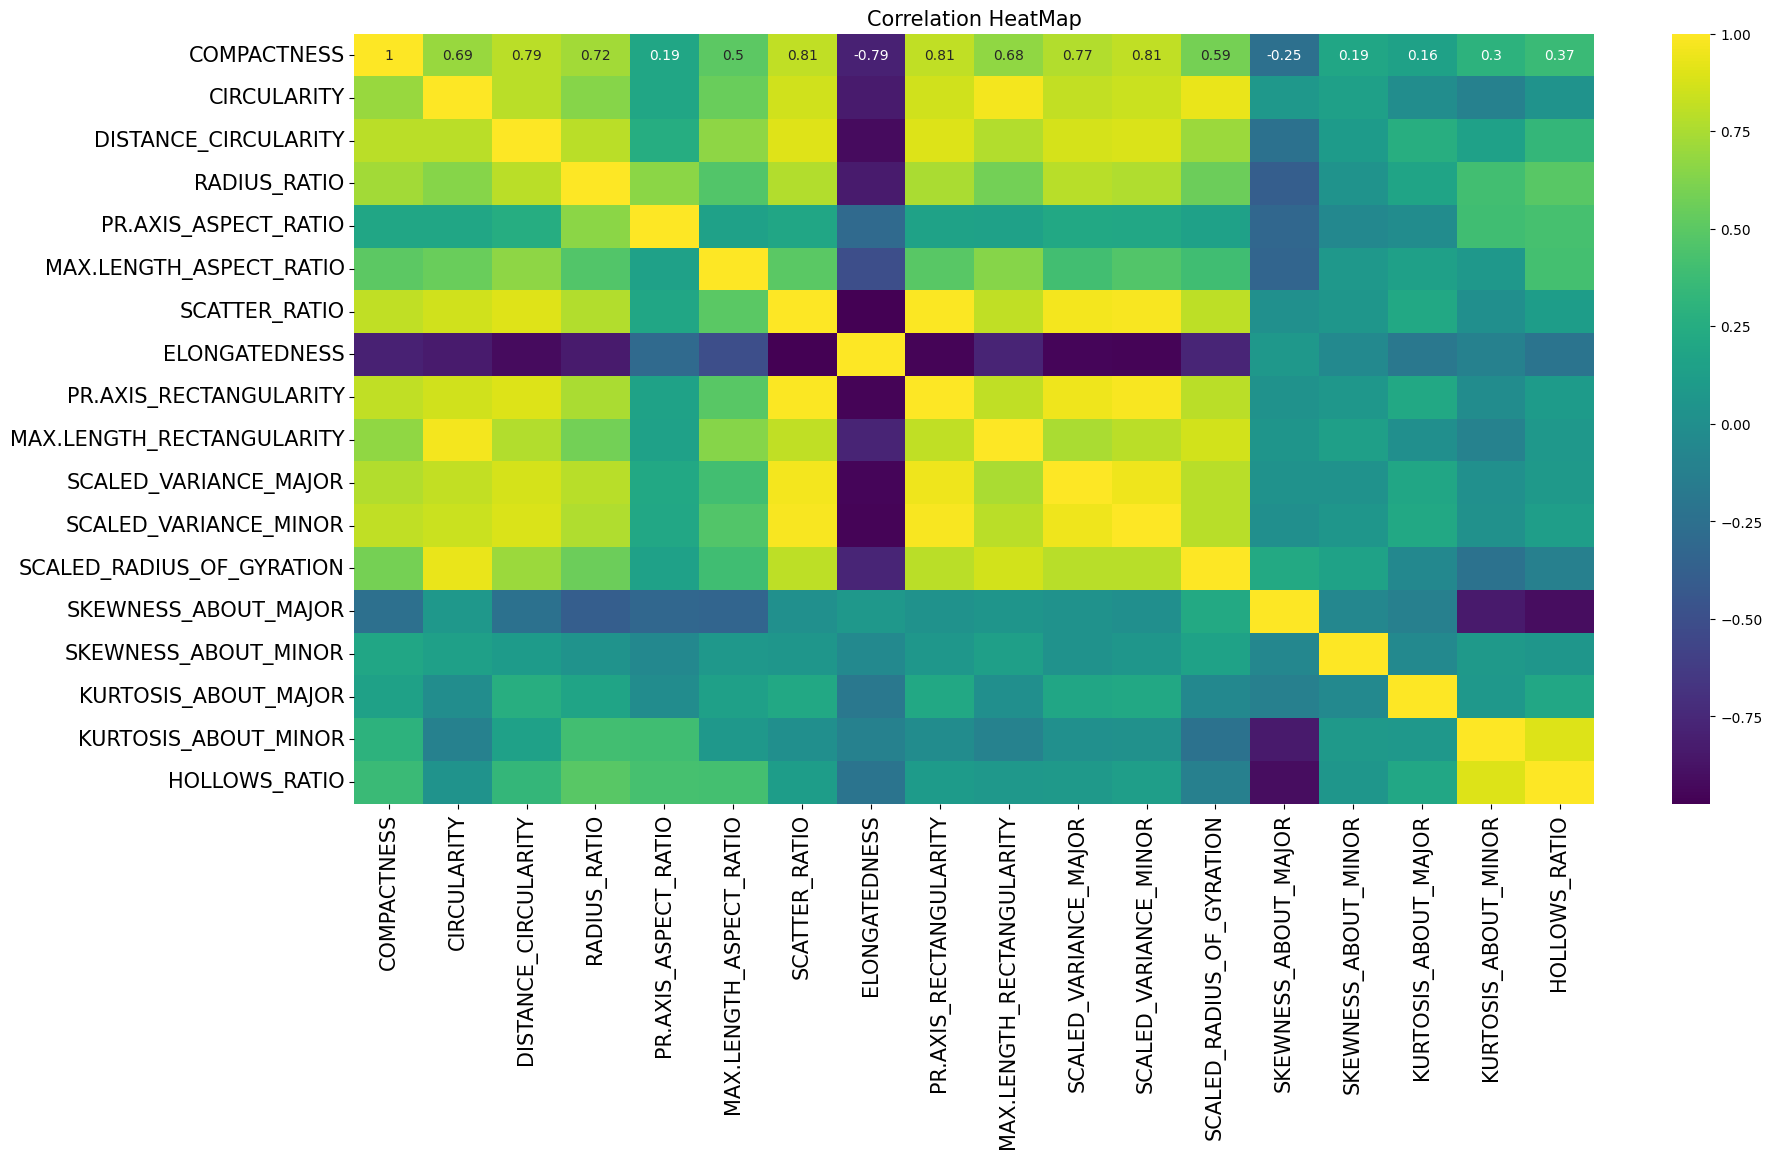

In [38]:
plt.figure(figsize = (20, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'viridis')

In [39]:
X = df.loc[:, df.columns != 'class']
y = df['Class'].astype('category').cat.codes

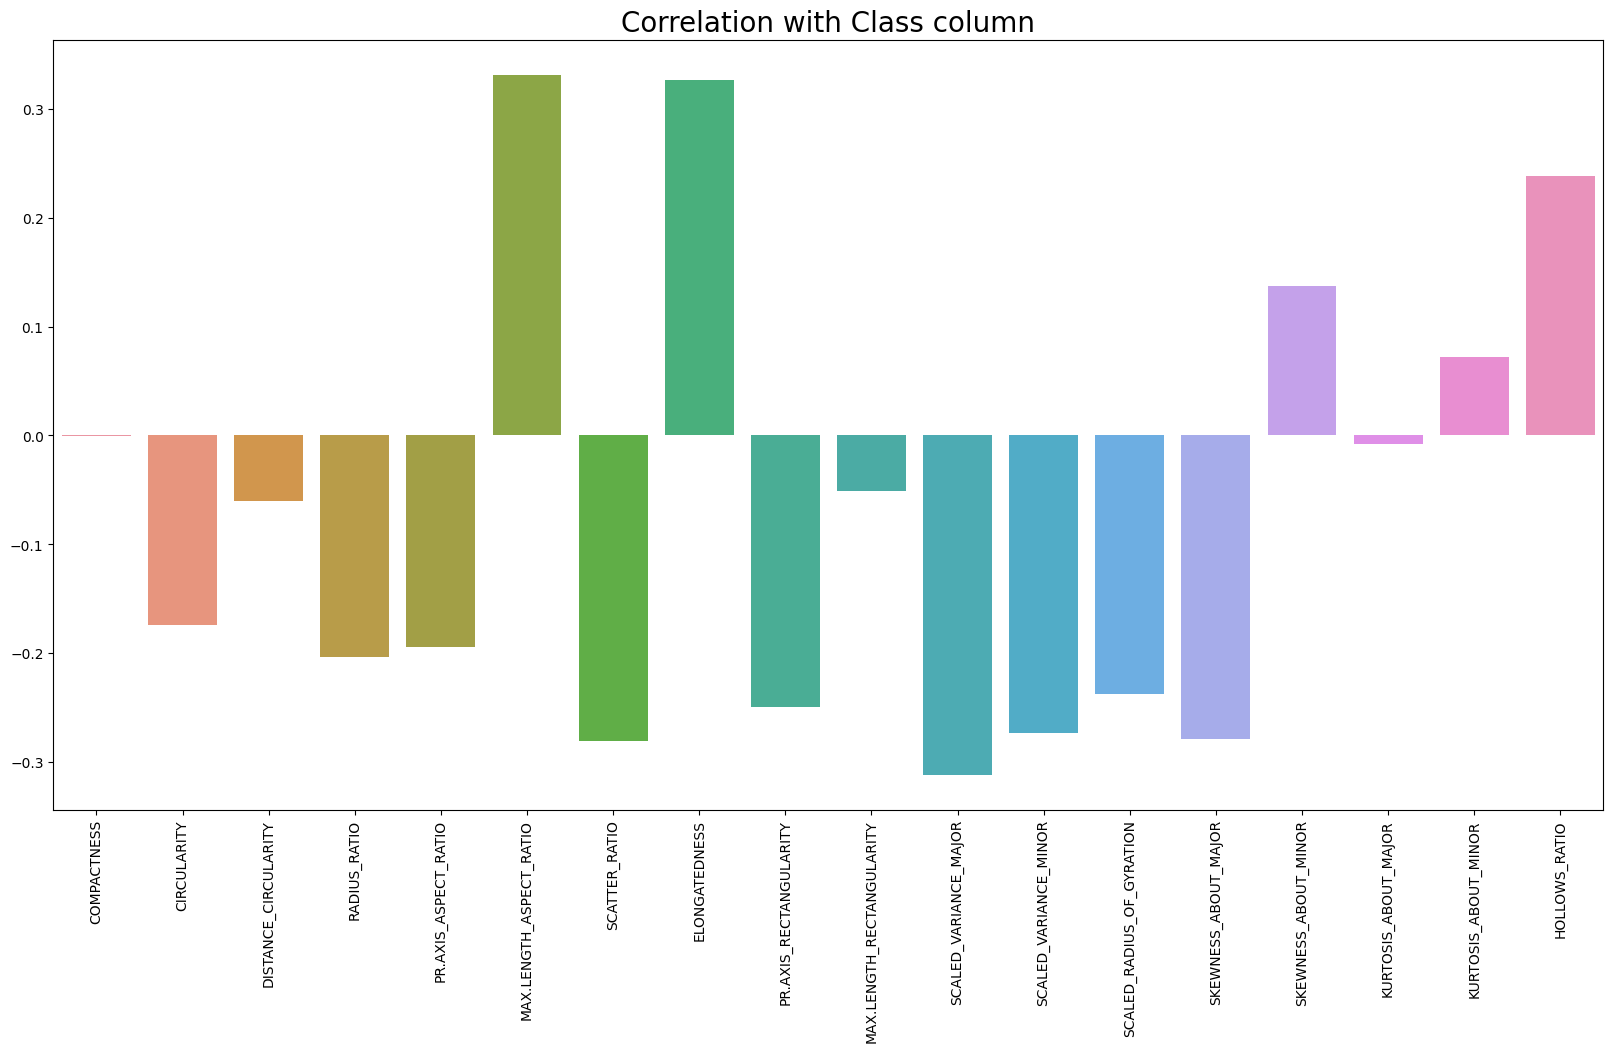

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame and y is your target column (Series)
# Filter out non-numeric columns from X
numeric_columns_X = X.select_dtypes(include=['float64', 'int64'])

# Check if y contains numeric data
if y.dtype in ['object', 'string', 'category']:
    # Convert y to numeric if it's categorical or object type (assuming it's ordinal)
    y = pd.to_numeric(y)  # Change this to the appropriate conversion method for your data

# Compute correlations
correlations = numeric_columns_X.corrwith(y)

# Plot the correlations
plt.figure(figsize=(20, 10))
sns.barplot(x=numeric_columns_X.columns, y=correlations)
plt.title('Correlation with Class column', fontsize=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()


In [41]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X contains categorical columns and numerical columns
# Separating categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creating pipelines for numerical and categorical transformations
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

# Preprocessing the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
X_std = preprocessor.fit_transform(X)


Text(0, 0.5, 'Percentage of Cumulative Explained Variance')

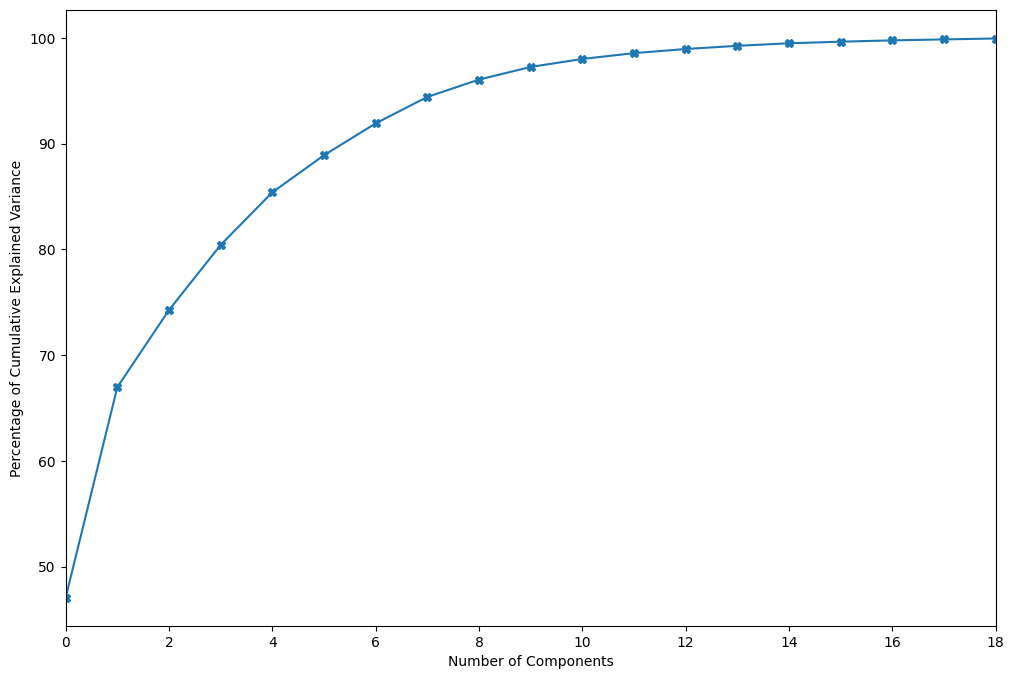

In [42]:
pca = PCA()

X_pca_ = pca.fit_transform(X_std)

plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')

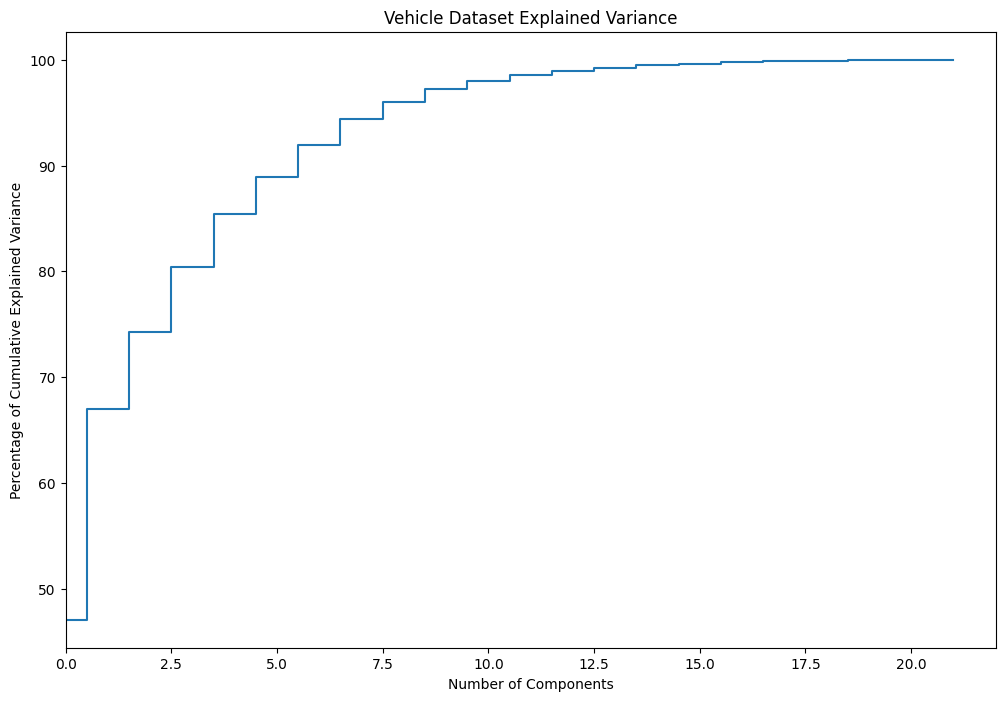

In [43]:
num_components = len(pca.explained_variance_ratio_)  # Get the length of explained variance ratio

plt.figure(figsize=(12, 8))
plt.step(list(range(num_components)), (np.cumsum(pca.explained_variance_ratio_) * 100), where='mid')
plt.xlim(0, num_components)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance')
plt.show()


In [44]:
print('Eigen Values: \n')
pca.explained_variance_

Eigen Values: 



array([4.01047453e+00, 1.69597051e+00, 6.21378074e-01, 5.24048786e-01,
       4.23991026e-01, 2.98582582e-01, 2.56856678e-01, 2.12834212e-01,
       1.39840634e-01, 1.01654791e-01, 6.45412140e-02, 4.67785939e-02,
       3.32040169e-02, 2.57293535e-02, 2.04486467e-02, 1.29123899e-02,
       1.05296404e-02, 7.97678834e-03, 7.05800620e-03, 5.12644100e-03,
       1.21176322e-03, 2.39851255e-32])

In [45]:
print('Eigen Vectors: \n')
pca.components_

Eigen Vectors: 



array([[ 2.68468319e-01,  3.09496861e-01,  2.65381976e-01,
         2.51734786e-01,  1.08761387e-01,  2.11191796e-01,
         3.10505868e-01, -2.88892311e-01,  3.09984577e-01,
         2.86231881e-01,  2.89342705e-01,  3.10841296e-01,
         2.72698486e-01, -5.52061644e-02,  3.86105957e-02,
         5.72262370e-02,  4.12751396e-02,  9.41237738e-02,
        -1.44830019e-02,  4.87971354e-02,  4.51075646e-02,
        -7.94216981e-02],
       [-7.58052369e-02,  1.32759160e-01, -3.88090785e-02,
        -1.53873843e-01, -2.29688813e-01, -1.20114793e-01,
         7.35488515e-02, -1.91482858e-02,  8.49450928e-02,
         1.10546969e-01,  7.58770822e-02,  7.02245874e-02,
         1.98207941e-01,  5.58064886e-01, -2.35951788e-02,
        -7.91633057e-02, -4.76115159e-01, -4.95157283e-01,
         1.17686184e-01, -2.79314748e-02, -5.68905091e-02,
        -3.28642001e-02],
       [-7.43486967e-02, -5.49393301e-02, -7.86531770e-02,
         2.30698517e-01,  5.59352616e-01, -4.39499658e-01,
    

In [46]:
print('The percentage of variation explained by each Eigen Vector: \n')
pca.explained_variance_ratio_

The percentage of variation explained by each Eigen Vector: 



array([4.70649520e-01, 1.99030738e-01, 7.29218674e-02, 6.14997821e-02,
       4.97574966e-02, 3.50401798e-02, 3.01434335e-02, 2.49771738e-02,
       1.64110074e-02, 1.19297051e-02, 7.57423870e-03, 5.48970516e-03,
       3.89665973e-03, 3.01947008e-03, 2.39975237e-03, 1.51533443e-03,
       1.23570668e-03, 9.36116555e-04, 8.28292812e-04, 6.01613843e-04,
       1.42206557e-04, 2.81477608e-33])

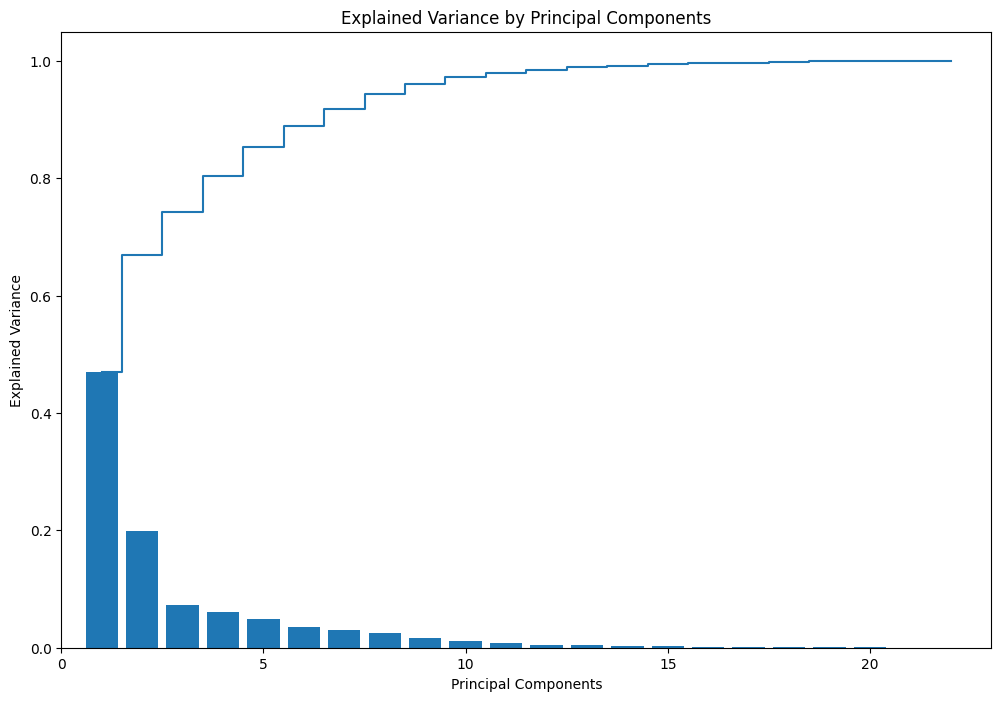

In [47]:
num_components = len(pca.explained_variance_ratio_)  # Get the number of Principal Components

plt.figure(figsize=(12, 8))
plt.step(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_)
plt.xlim(0, num_components + 1)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.show()


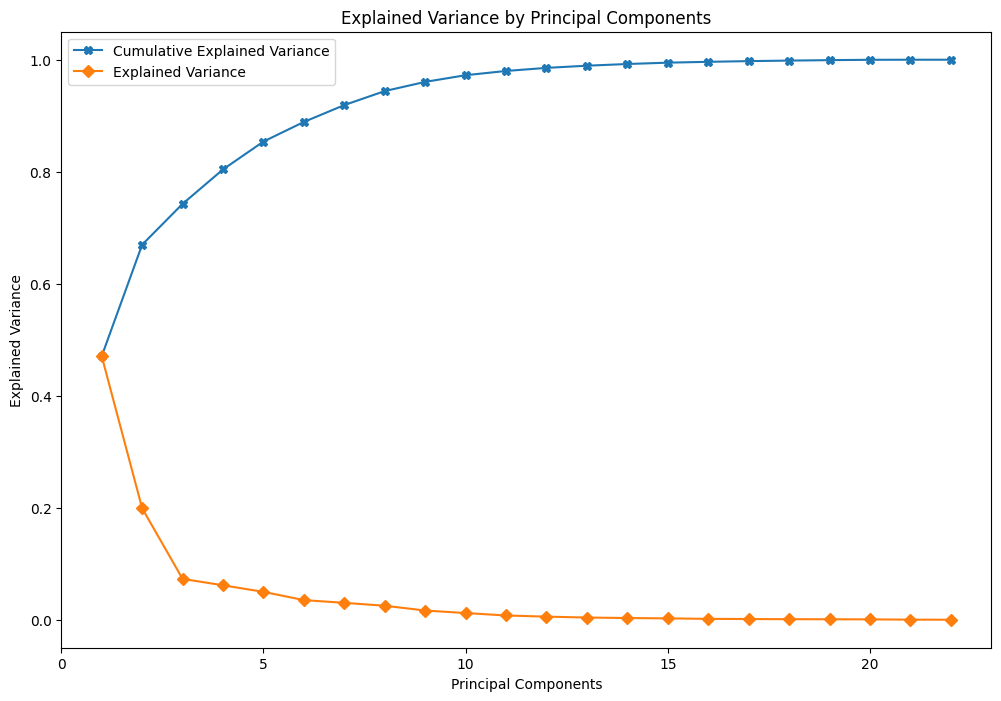

In [48]:
num_components = len(pca.explained_variance_ratio_)  # Get the number of Principal Components

plt.figure(figsize=(12, 8))
plt.plot(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='X', label='Cumulative Explained Variance')
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_, marker='D', label='Explained Variance')
plt.xlim(0, num_components + 1)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend()
plt.title('Explained Variance by Principal Components')
plt.show()


In [49]:
pca_7 = PCA(n_components = 7)

X_pca = pca_7.fit_transform(X_std)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 19
Reduced number of features: 7


In [50]:
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5,6
0,0.361242,-0.491968,0.060959,-0.820748,-0.883439,-1.166295,-0.107811
1,-1.044799,-0.306020,-0.970965,-0.154809,-0.031136,-0.097711,-0.026411
2,2.493229,0.149587,-0.212457,-0.635879,0.790395,-0.601025,-0.620920
3,-1.018848,-2.185726,-0.377573,-0.426371,-0.337785,0.270793,-0.034300
4,-0.456106,1.113989,0.509270,-0.281764,0.205350,-0.560610,0.107970


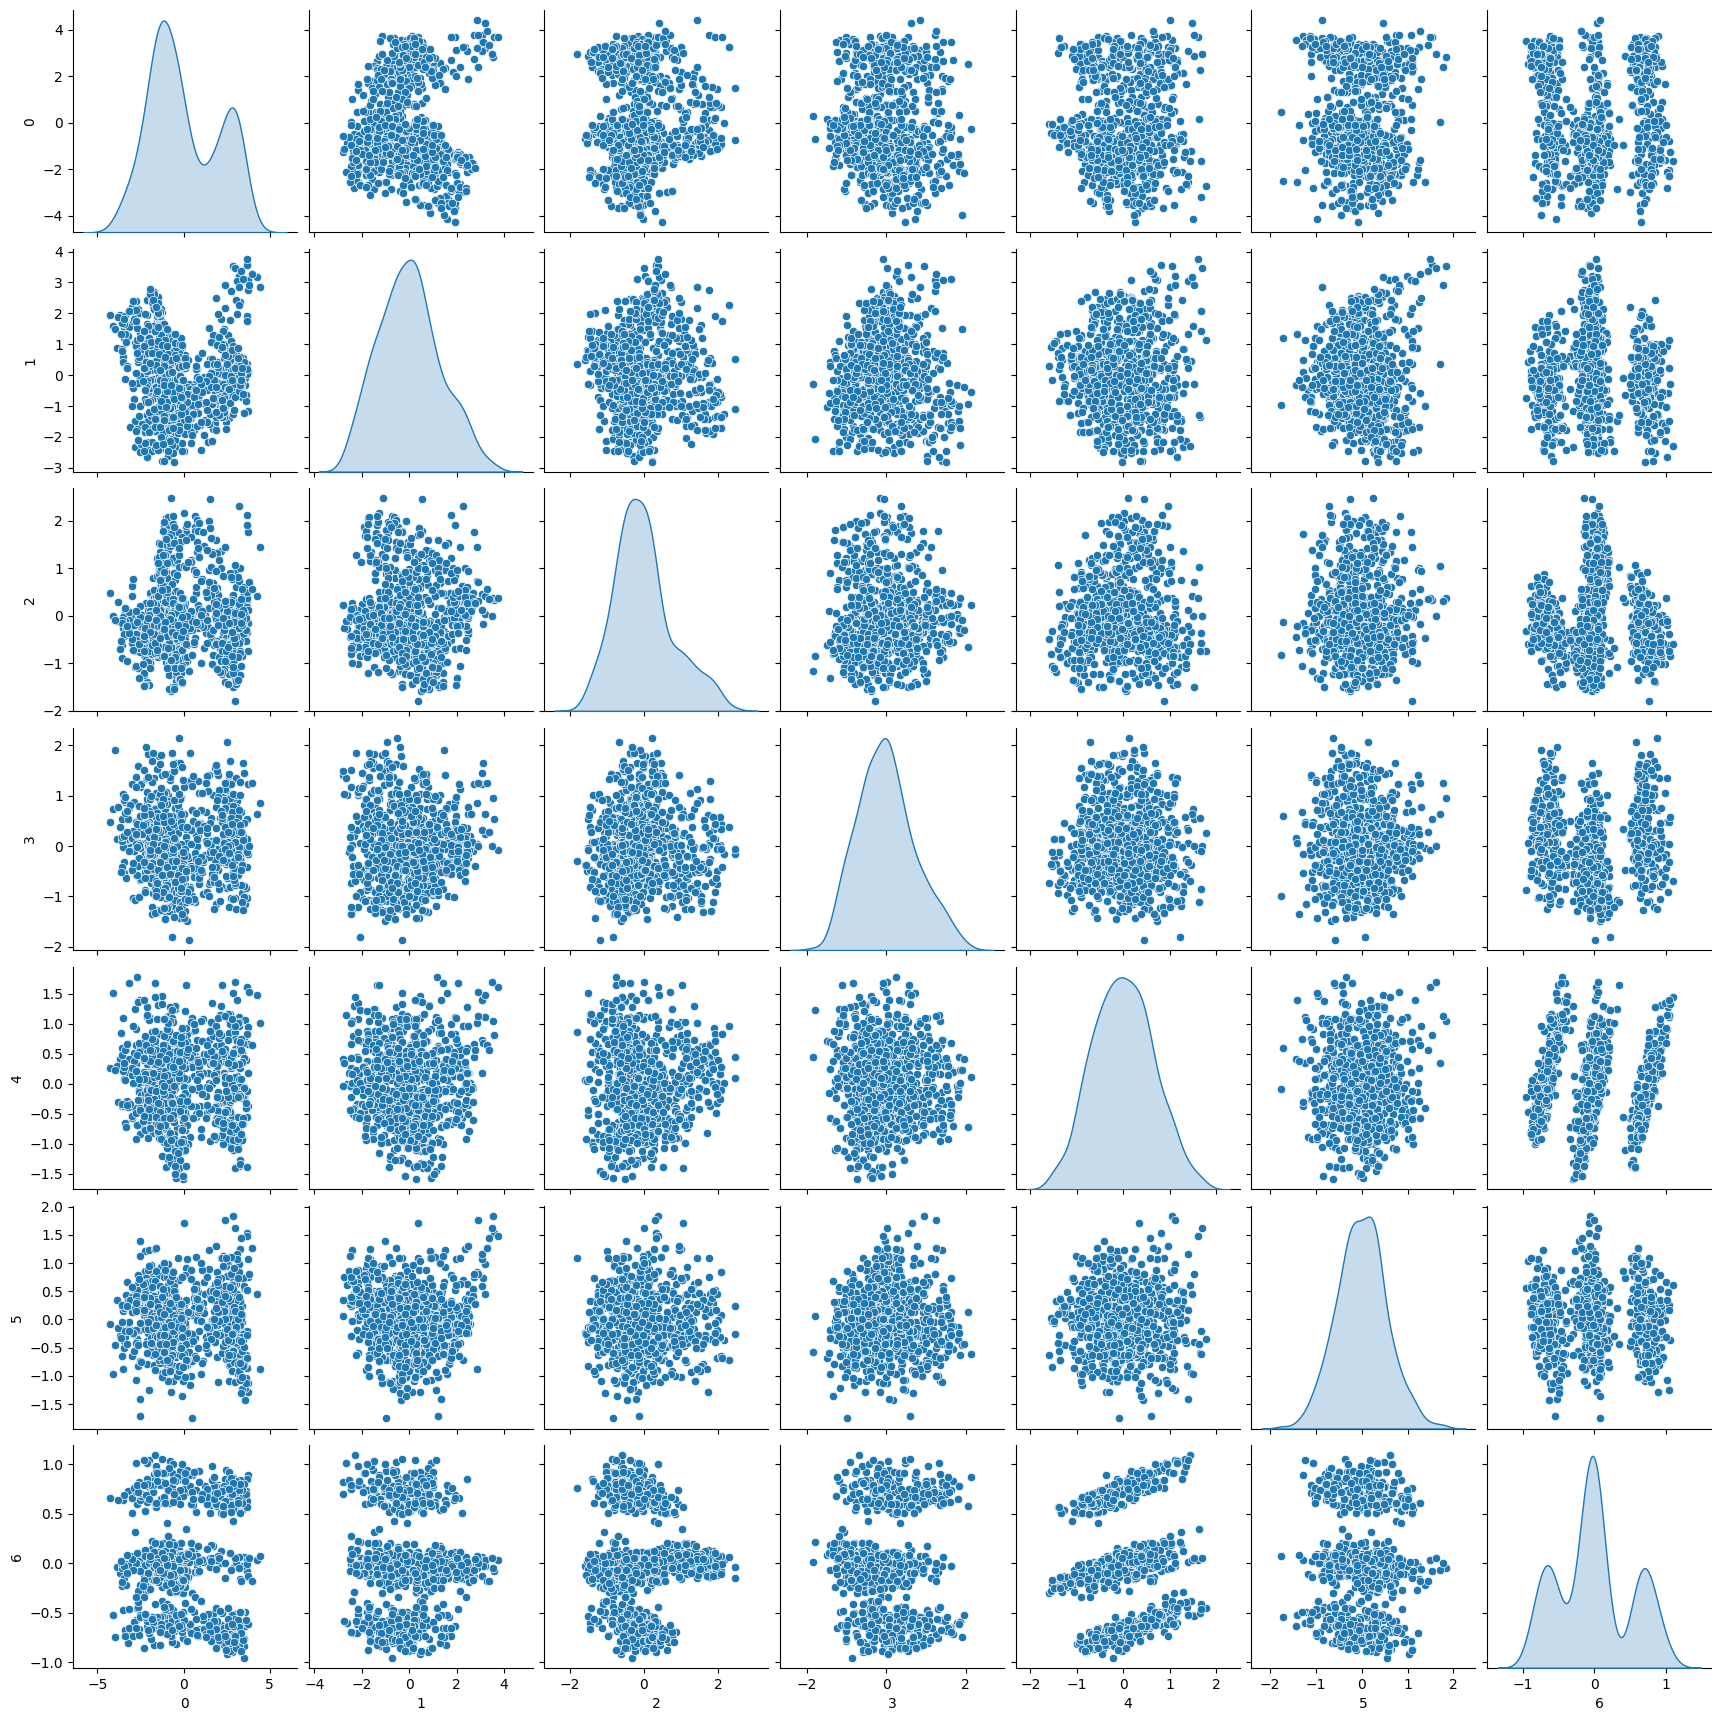

In [51]:
sns.pairplot(pca_df, diag_kind = 'kde')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

In [53]:
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 592 rows and 22 columns.


In [54]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 254 rows and 22 columns.


In [55]:
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [56]:
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 592 rows and 7 columns.


In [57]:
rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 254 rows and 7 columns.


SVC Model of dataset with PCA

Accuracy Score of Training Data:  0.9983108108108109

Accuracy Score of Test Data: 1.0

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        58

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254


Mean Absolute Error of SVC:
 0.0

Confusion Matrix of SVC:
 [[71  0  0  0]
 [ 0 55  0  0]
 [ 0  0 70  0]
 [ 0  0  0 58]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC with PCA Model')

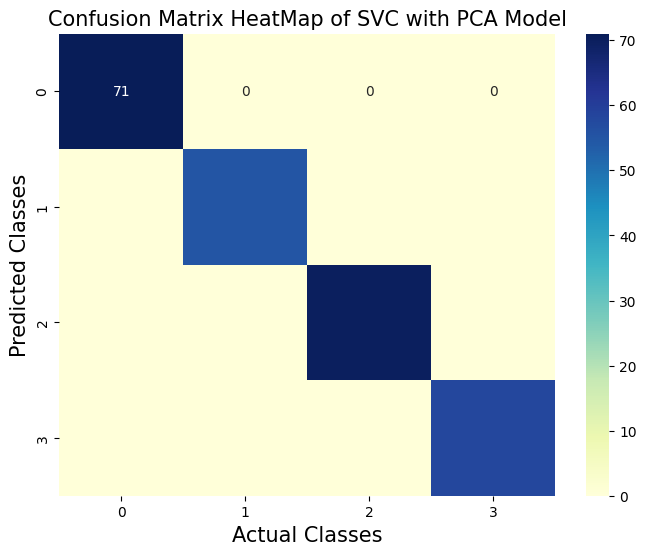

In [58]:
svc_model = SVC(kernel = 'linear', gamma = 'scale', C = 1)

print('SVC Model of dataset with PCA')
# fitting the model
svc_model.fit(X_tr, y_tr)

# predict the response
y_predictSVC_pca = svc_model.predict(X_te)

modeltrSVC_pca_score = svc_model.score(X_tr, y_tr)
print('\nAccuracy Score of Training Data: ', modeltrSVC_pca_score)
modelSVC_pca_score = accuracy_score(y_te, y_predictSVC_pca)
print('\nAccuracy Score of Test Data:', modelSVC_pca_score)

cfm_SVC_pca = confusion_matrix(y_te, y_predictSVC_pca)


print('\nClassification Report of SVC Model:\n ', classification_report(y_te, y_predictSVC_pca))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te, y_predictSVC_pca))
print('\nConfusion Matrix of SVC:\n', cfm_SVC_pca)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_pca, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC with PCA Model', fontsize = 15)

In [59]:
precision_SVC_pca, recall_SVC_pca, f1_score_SVC_pca, support = precision_recall_fscore_support(y_te, y_predictSVC_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_pca)
print('Recall Score :', '%0.2f' % recall_SVC_pca)
print('F1-Score :', '%0.2f' % f1_score_SVC_pca)
print('Accuracy Score :','%0.2f' % modelSVC_pca_score)

Precision Score : 1.00
Recall Score : 1.00
F1-Score : 1.00
Accuracy Score : 1.00


SVC Model of dataset without PCA

Accuracy Score of Training Data:  1.0

Accuracy Score of Test Data: 1.0

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        58

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254


Mean Absolute Error of SVC:
 0.0

Confusion Matrix of SVC:
 [[71  0  0  0]
 [ 0 55  0  0]
 [ 0  0 70  0]
 [ 0  0  0 58]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC Model')

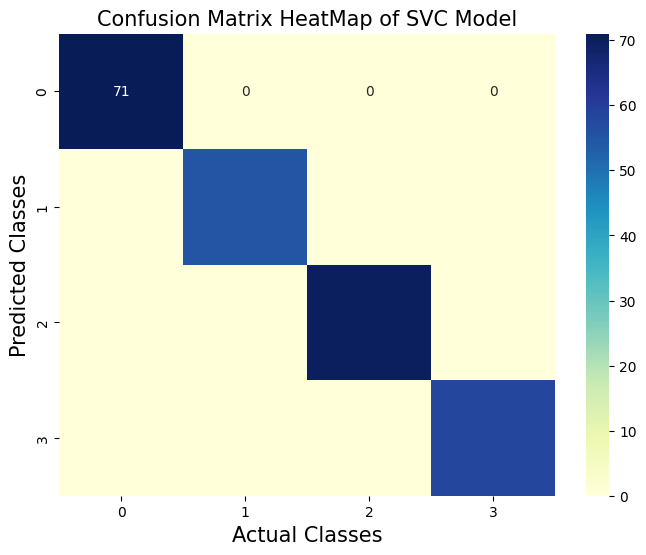

In [60]:
print('SVC Model of dataset without PCA')
# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

modeltrSVC_score = svc_model.score(X_train, y_train)
print('\nAccuracy Score of Training Data: ', modeltrSVC_score)

cfm_SVC = confusion_matrix(y_test, y_predictSVC)


# evaluate accuracy
modelSVC_score = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Model', fontsize = 15)

In [61]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score)

Precision Score : 1.00
Recall Score : 1.00
F1-Score : 1.00
Accuracy Score : 1.00


In [62]:
mdllists = []
mdllists.append(['Support Vector Classifier with PCA', modeltrSVC_pca_score * 100, modelSVC_pca_score * 100, recall_SVC_pca * 100, precision_SVC_pca * 100])
mdllists.append(['Support Vector Classifier without PCA', modeltrSVC_score * 100, modelSVC_score * 100, recall_SVC * 100, precision_SVC * 100])
mdl_df = pd.DataFrame(mdllists, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
mdl_df

,Model,Accuracy Score of Training Data,Accuracy Score of Test Data,Recall Score,Precision Score
0,Support Vector Classifier with PCA,99.831081,100.0,100.0,100.0
1,Support Vector Classifier without PCA,100.000000,100.0,100.0,100.0


In [63]:
param_grid_pca = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]


# Make grid search classifier
clf_grid_pca = GridSearchCV(SVC(), param_grid_pca, verbose = 1)
 
# Train the classifier
clf_grid_pca.fit(X_tr, y_tr)
 

print('\n\nBest Parameters:\n', clf_grid_pca.best_params_)
print('\n\nBest Estimators:\n', clf_grid_pca.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Parameters:
 {'C': 1, 'kernel': 'linear'}


Best Estimators:
 SVC(C=1, kernel='linear')



Accuracy Score of Training Data:  0.9983108108108109

Accuracy Score of Test Data: 1.0

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        58

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254


Mean Absolute Error of SVC:
 0.0

Confusion Matrix of SVC:
 [[71  0  0  0]
 [ 0 55  0  0]
 [ 0  0 70  0]
 [ 0  0  0 58]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC with PCA Model')

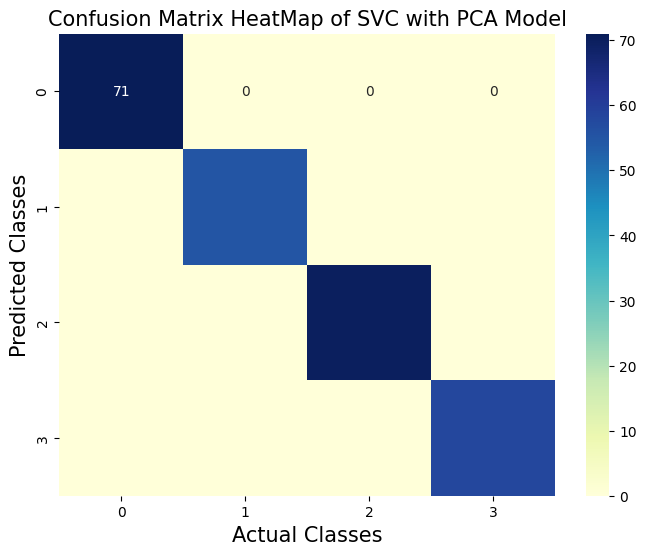

In [64]:
svc_cv_pca_model = SVC(kernel = 'rbf', gamma = 'scale', C = 1)


# fitting the model
svc_cv_pca_model.fit(X_tr, y_tr)

# predict the response
y_predictSVC_cv_pca = svc_cv_pca_model.predict(X_te)

modeltrSVC_cv_pca_score = svc_cv_pca_model.score(X_tr, y_tr)
print('\nAccuracy Score of Training Data: ', modeltrSVC_cv_pca_score)
modelSVC_cv_pca_score = accuracy_score(y_te, y_predictSVC_cv_pca)
print('\nAccuracy Score of Test Data:', modelSVC_cv_pca_score)

cfm_SVC_cv_pca = confusion_matrix(y_te, y_predictSVC_cv_pca)


print('\nClassification Report of SVC Model:\n ', classification_report(y_te, y_predictSVC_cv_pca))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te, y_predictSVC_cv_pca))
print('\nConfusion Matrix of SVC:\n', cfm_SVC_cv_pca)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_cv_pca, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC with PCA Model', fontsize = 15)

In [65]:
precision_SVC_cv_pca, recall_SVC_cv_pca, f1_score_SVC_cv_pca, support = precision_recall_fscore_support(y_te, y_predictSVC_cv_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_cv_pca)
print('Recall Score :', '%0.2f' % recall_SVC_cv_pca)
print('F1-Score :', '%0.2f' % f1_score_SVC_cv_pca)
print('Accuracy Score :','%0.2f' % modelSVC_cv_pca_score)

Precision Score : 1.00
Recall Score : 1.00
F1-Score : 1.00
Accuracy Score : 1.00


In [66]:
param_grid = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]


# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose = 1)
 
# Train the classifier
clf_grid.fit(X_train, y_train)
 

print('\n\nBest Parameters:\n', clf_grid.best_params_)
print('\n\nBest Estimators:\n', clf_grid.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Parameters:
 {'C': 0.5, 'kernel': 'rbf'}


Best Estimators:
 SVC(C=0.5)


Accuracy Score of Training Data:  1.0

Accuracy Score of Test Data: 1.0

Classification Report of SVC Linear Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        58

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254


Mean Absolute Error of SVC Linear:
 0.0

Confusion Matrix of SVC Linear:
 [[71  0  0  0]
 [ 0 55  0  0]
 [ 0  0 70  0]
 [ 0  0  0 58]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC Grid Search Model')

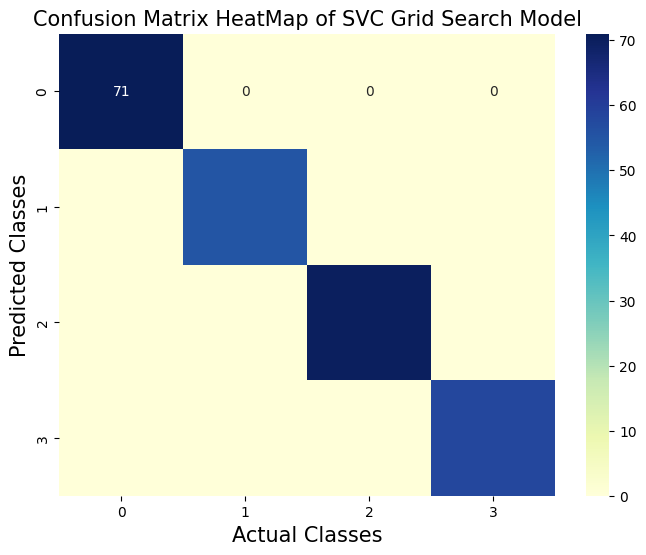

In [67]:
svc_cv_model = SVC(kernel = 'rbf', gamma = 'scale', C = 1)

# fitting the model
svc_cv_model.fit(X_train, y_train)

# predict the response
y_predictSVC_cv = svc_cv_model.predict(X_test)

modeltrSVC_cv_score = svc_cv_model.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrSVC_cv_score)

cfm_SVC_cv = confusion_matrix(y_test, y_predictSVC_cv)


# evaluate accuracy
modelSVC_score_cv = accuracy_score(y_test, y_predictSVC_cv)
print('\nAccuracy Score of Test Data:', modelSVC_score_cv)
print('\nClassification Report of SVC Linear Model:\n ', classification_report(y_test, y_predictSVC_cv))
print('\nMean Absolute Error of SVC Linear:\n', mean_absolute_error(y_test, y_predictSVC_cv))
print('\nConfusion Matrix of SVC Linear:\n', cfm_SVC_cv)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_cv, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Grid Search Model', fontsize = 15)

In [68]:
precision_SVC_cv, recall_SVC_cv, f1_score_SVC_cv, support = precision_recall_fscore_support(y_test, y_predictSVC_cv, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_cv)
print('Recall Score :', '%0.2f' % recall_SVC_cv)
print('F1-Score :', '%0.2f' % f1_score_SVC_cv)
print('Accuracy Score :','%0.2f' % modelSVC_score_cv)

Precision Score : 1.00
Recall Score : 1.00
F1-Score : 1.00
Accuracy Score : 1.00


In [73]:
modellsts = []

modellsts.append(['Support Vector Classifier with PCA using Grid Search', modeltrSVC_cv_pca_score * 100, modelSVC_cv_pca_score * 100, recall_SVC_cv_pca * 100, precision_SVC_cv_pca * 100])
modellsts.append(['Support Vector Classifier using Grid Search', modeltrSVC_cv_score * 100, modelSVC_score_cv * 100, recall_SVC_cv * 100, precision_SVC_cv * 100])

model_df = pd.DataFrame(modellsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
model_df

,Model,Accuracy Score of Training Data,Accuracy Score of Test Data,Recall Score,Precision Score
0,Support Vector Classifier with PCA using Grid ...,99.831081,100.0,100.0,100.0
1,Support Vector Classifier using Grid Search,100.000000,100.0,100.0,100.0


Text(0.5, 1.0, 'Comparison of Classification Models')

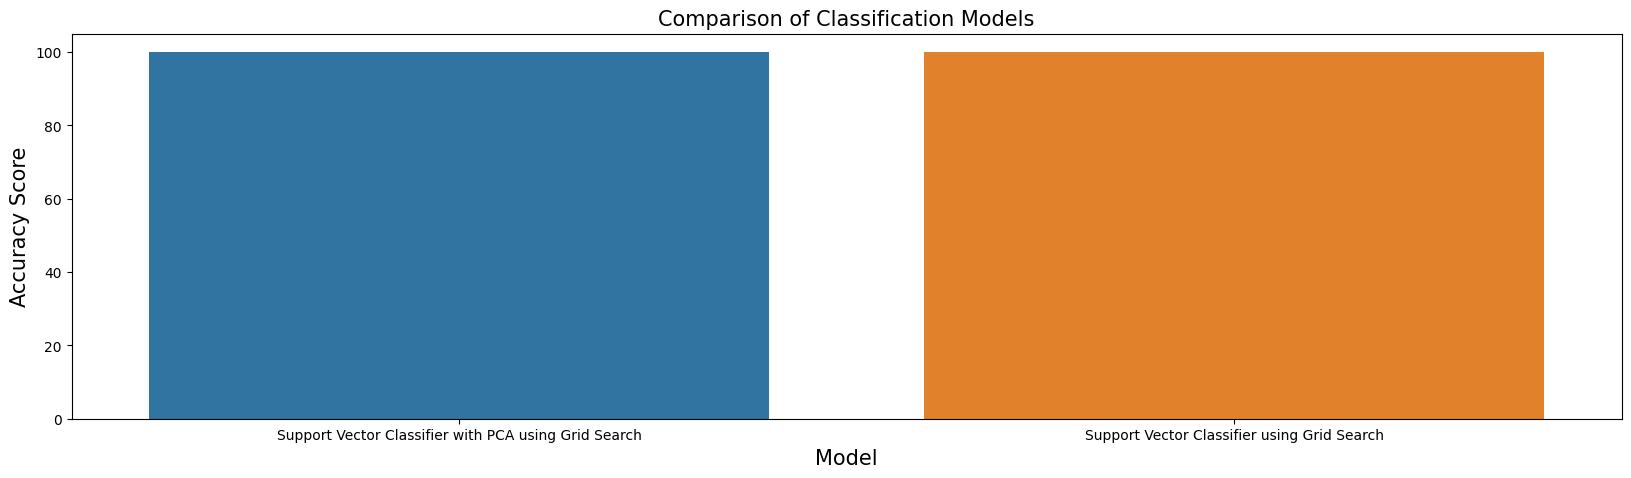

In [74]:
plt.figure(figsize = (20, 5))
sns.barplot(x = model_df['Model'], y = model_df['Accuracy Score of Test Data'], data = model_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)